In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows',10)

In [2]:
continuous_columns = ['price','sqft_living','sq_lot','condition','grade','sqft_above','yr_built', 'lat','long']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','sqft_basement','yr_renovated']

In [3]:
#columns to be dropped
dropped_columns = ['id','date','view','sqft_living15','sqft_lot15']

In [4]:
#df.loc[(df.lat <47.2) & (df.long > -121.8)]
# want to use longitudes less than -121.647

In [5]:
#plt.scatter(df.long,df.lat)

In [6]:
df = pd.read_csv('data/kc_house_data.csv')

# Data Cleaning

## Dropping Unwanted Columns

In [7]:
df = df.drop(columns=dropped_columns)

In [8]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [9]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  2376
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  3842
zipcode :  0
lat :  0
long :  0


In [10]:
df.waterfront.isna()

0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595     True
21596    False
Name: waterfront, Length: 21597, dtype: bool

In [11]:
df.waterfront[0]

nan

In [12]:
df.yr_renovated.isna()

0        False
1        False
2         True
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: yr_renovated, Length: 21597, dtype: bool

In [13]:
df.yr_renovated[2]

nan

## filling NA with 0, converting these to categorical later if needed

In [14]:
df = df.fillna(0)

In [15]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  0
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  0
zipcode :  0
lat :  0
long :  0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
dtypes: float64(7), int64(8), object(1)
memory usage: 2.6+ MB


In [17]:
df.loc[df.sqft_basement == '?']

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
6       257500.0         3       2.25         1715      6819     2.0   
18      189000.0         2       1.00         1200      9850     1.0   
42      861990.0         5       2.75         3595      5639     2.0   
79      720000.0         4       2.50         3450     39683     2.0   
112     272500.0         3       1.75         1540     12600     1.0   
...          ...       ...        ...          ...       ...     ...   
21442   504600.0         5       3.00         2360      5000     1.0   
21447   337500.0         4       2.50         2330      4907     2.0   
21473   352500.0         2       2.50          980      1010     3.0   
21519   332000.0         4       2.50         2380      5737     2.0   
21581  1580000.0         4       3.25         3410     10125     2.0   

       waterfront  condition  grade  sqft_above sqft_basement  yr_built  \
6             0.0          3      7        1715             ?      1995   
18            0.0          4      7        1200             ?      1921   
42            0.0          3      9        3595             ?      2014   
79            0.0          3     10        3450             ?      2002   
112           0.0          4      7        1160             ?      1980   
...           ...        ...    ...         ...           ...       ...   
21442         0.0          3      7        1390             ?      2008   
21447         0.0          3      7        2330             ?      2013   
21473         0.0          3      8         980             ?      2008   
21519         0.0          3      7        2380             ?      2010   
21581         0.0          3     10        3410             ?      2007   

       yr_renovated  zipcode      lat     long  
6               0.0    98003  47.3097 -122.327  
18              0.0    98002  47.3089 -122.210  
42              0.0    98053  47.6848 -122.016  
79              0.0    98010  47.3420 -122.025  
112             0.0    98038  47.3624 -122.031  
...             ...      ...      ...      ...  
21442           0.0    98103  47.6931 -122.330  
21447           0.0    98042  47.3590 -122.081  
21473           0.0    98117  47.6844 -122.387  
21519           0.0    98023  47.2815 -122.356  
21581           0.0    98040  47.5653 -122.223  

[454 rows x 16 columns]

In [18]:
df = df.replace(to_replace="?",value=0)

In [19]:
df.sqft_basement = df.sqft_basement.astype(float)

In [20]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [21]:
#handling the 33 bedrooms

In [22]:
df = df.drop(df.loc[df.bedrooms ==33].index)

# Exploring the Data

## Visualizations

In [23]:
len(df.columns)

16

In [24]:
sns.set_style("darkgrid")

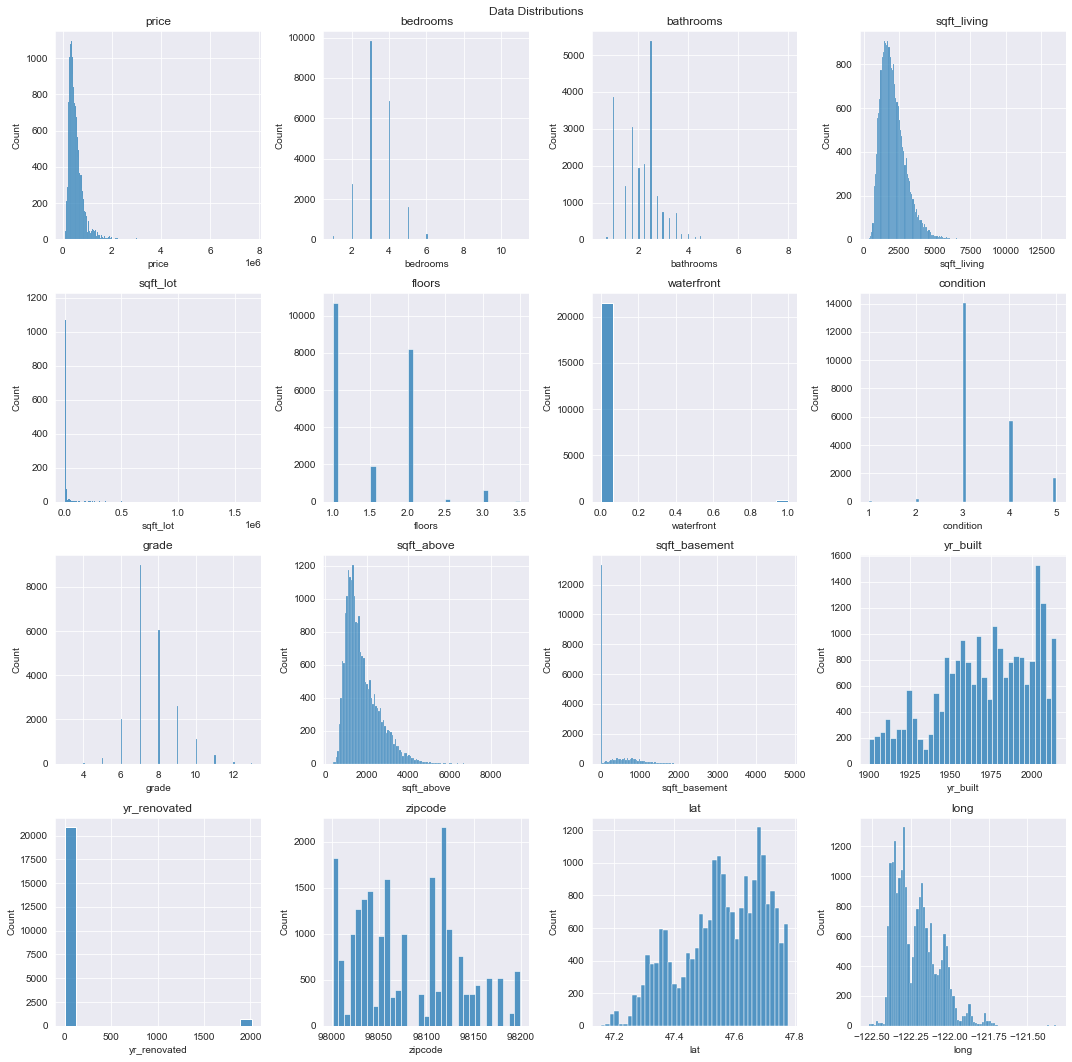

In [25]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    sns.histplot(df[col],ax=ax)
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

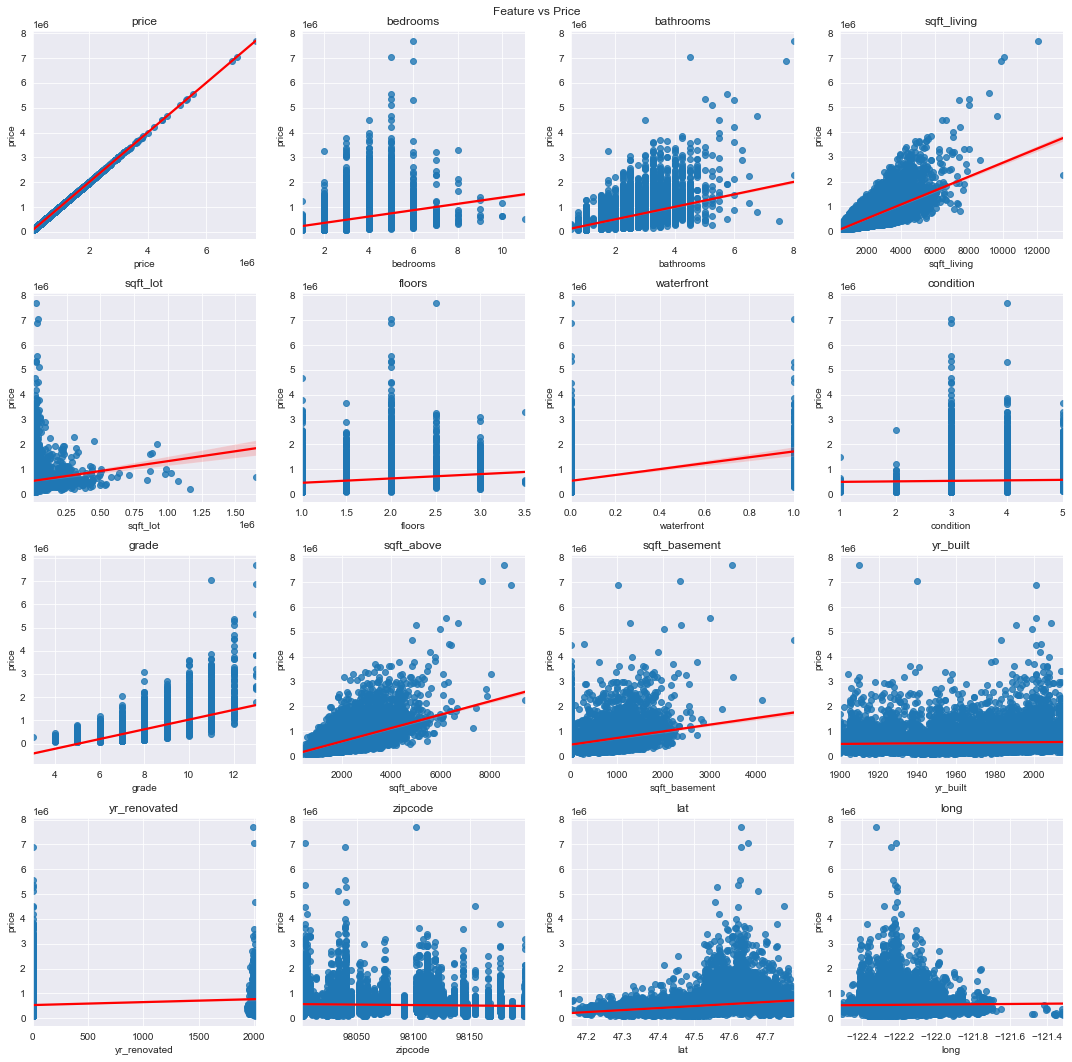

In [26]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='price', data=df, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

In [27]:
df.loc[:,['sqft_living','sqft_above','sqft_basement']]

sqft_living  sqft_above  sqft_basement
0             1180        1180            0.0
1             2570        2170          400.0
2              770         770            0.0
3             1960        1050          910.0
4             1680        1680            0.0
...            ...         ...            ...
21592         1530        1530            0.0
21593         2310        2310            0.0
21594         1020        1020            0.0
21595         1600        1600            0.0
21596         1020        1020            0.0

[21596 rows x 3 columns]

# Findings HERE

# Generating / Modifying Features

In [28]:
mod_df = df

## Price Per Square Foot (PSF) using sqft_above

In [29]:
mod_df['psf'] = mod_df['price'] / mod_df['sqft_above']

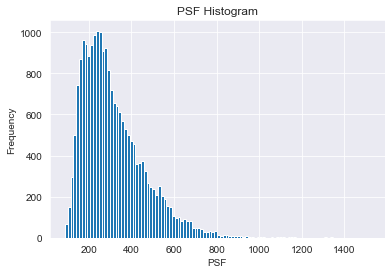

In [30]:
plt.hist(mod_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency');

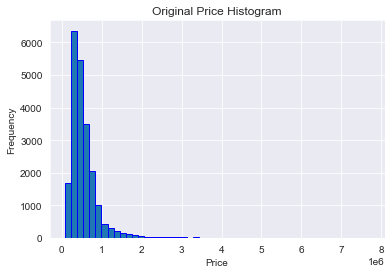

In [31]:
plt.hist(mod_df['price'], bins=50, ec = 'blue');
plt.title('Original Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency');

## Living to Lot Sqft Ratio

In [32]:
mod_df['livtolot'] = mod_df['sqft_living']/mod_df['sqft_lot']

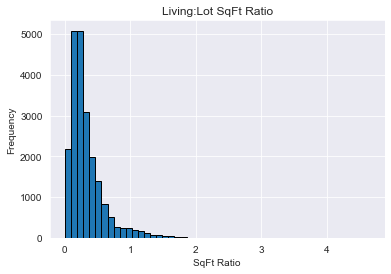

In [33]:
plt.hist(mod_df['livtolot'], bins=50, ec = 'black');
plt.title('Living:Lot SqFt Ratio')
plt.xlabel('SqFt Ratio')
plt.ylabel('Frequency');

## Basement to Categorical

In [34]:
mod_df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [35]:
mod_df['has_basement'] = mod_df['sqft_basement'] > 0

In [36]:
mod_df['has_basement']

0        False
1         True
2        False
3         True
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: has_basement, Length: 21596, dtype: bool

In [37]:
mod_df['has_basement'] = mod_df['has_basement'].astype(int)

In [38]:
mod_df['has_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: has_basement, Length: 21596, dtype: int32

## Renovation Year to Categorical

In [39]:
# Using 27 years as a cutoff between recent renovations

In [40]:
mod_df['rec_reno'] = (mod_df['yr_renovated'] > 1988).astype(int)

In [41]:
mod_df['rec_reno']

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: rec_reno, Length: 21596, dtype: int32

## Adding Geo Locations

In [42]:
# Added after initial modeling failed

In [43]:
def area_split(lat,long):
    #Outer Label
    if long > -121.647:
        return 2
    #North Label
    if lat > 47.5:
        return 0
    #South Label
    else:
        return 1

In [44]:
mod_df.apply(lambda x: area_split(x.lat,x.long), axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Length: 21596, dtype: int64

In [45]:
mod_df['location'] = mod_df.apply(lambda x: area_split(x.lat,x.long), axis=1)

In [46]:
mod_df.location.value_counts()

0    14976
1     6602
2       18
Name: location, dtype: int64

## Dropping features used in modification

In [47]:
add_drop_columns = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','yr_renovated']

In [48]:
mod_df = mod_df.drop(add_drop_columns,axis=1)

In [49]:
mod_df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'zipcode', 'psf', 'livtolot', 'has_basement', 'rec_reno',
       'location'],
      dtype='object')

## Modified Data Visualization Checks

In [50]:
len(mod_df.columns)

13

IndexError: index 3 is out of bounds for axis 0 with size 3

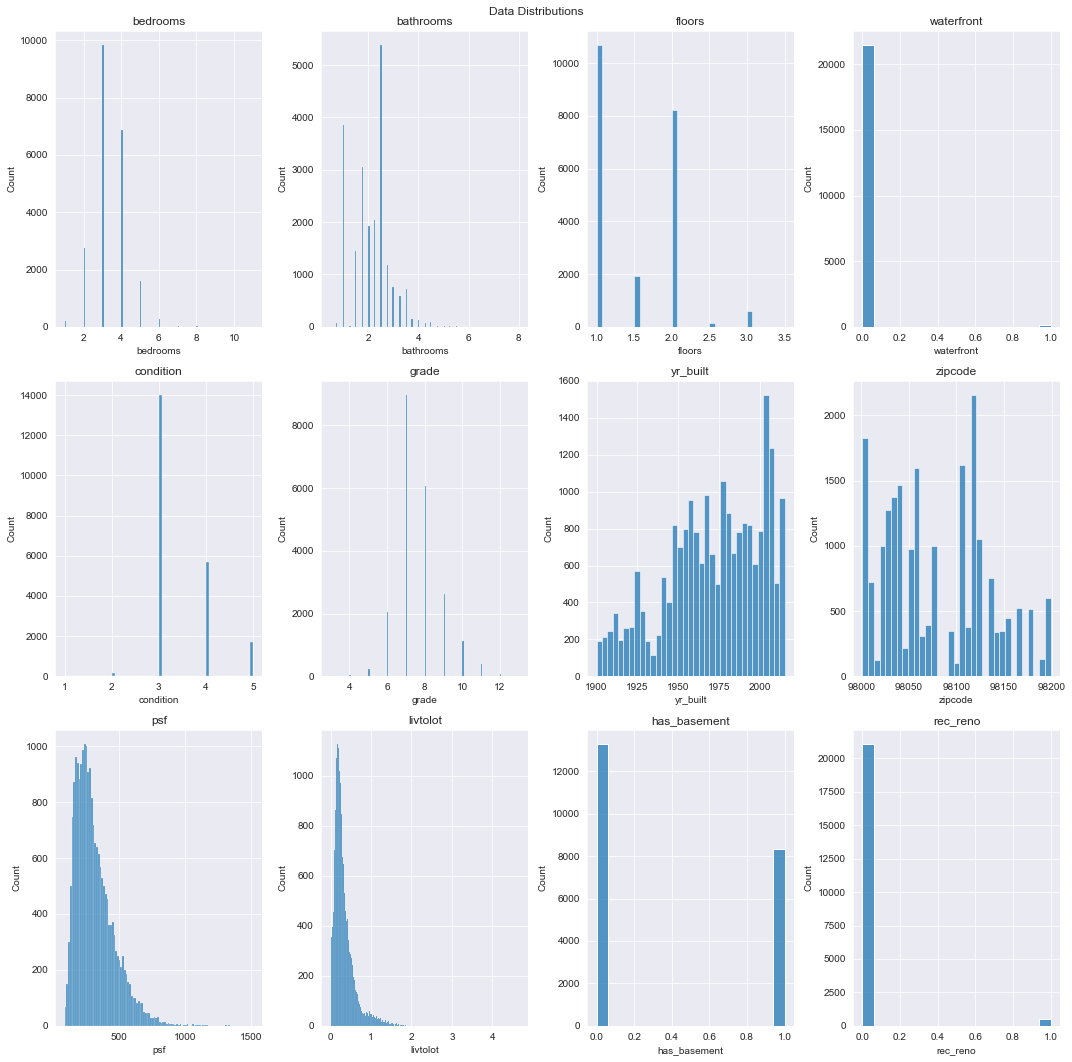

In [51]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(mod_df.columns)):
    col = mod_df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    sns.histplot(mod_df[col],ax=ax)
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

IndexError: index 3 is out of bounds for axis 0 with size 3

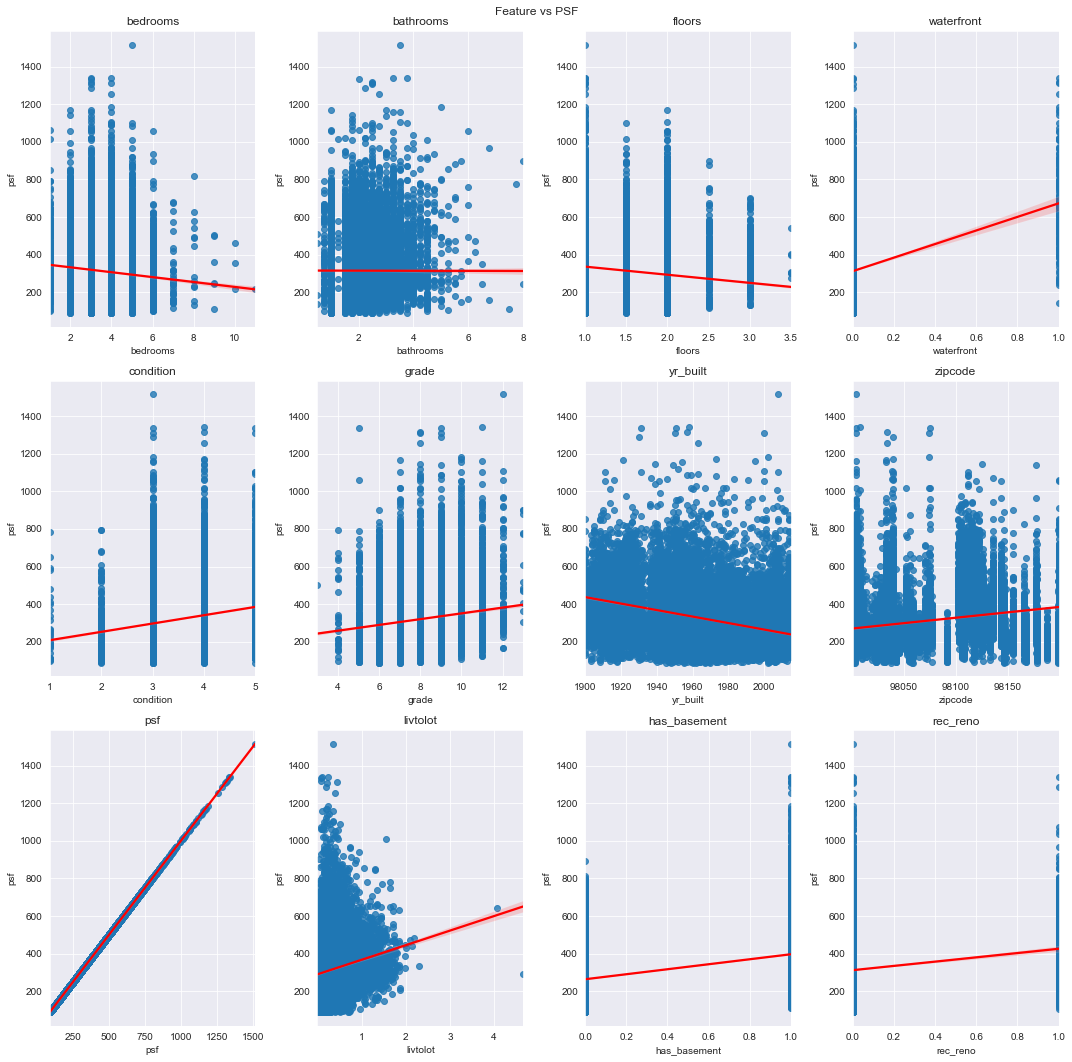

In [52]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(mod_df.columns)):
    col = mod_df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='psf', data=mod_df, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs PSF')
    fig.tight_layout()

# Multicollinearity

In [62]:
mod_df.corr() > .75

bedrooms  bathrooms  floors  waterfront  condition  grade  \
bedrooms          True      False   False       False      False  False   
bathrooms        False       True   False       False      False  False   
floors           False      False    True       False      False  False   
waterfront       False      False   False        True      False  False   
condition        False      False   False       False       True  False   
...                ...        ...     ...         ...        ...    ...   
psf              False      False   False       False      False  False   
livtolot         False      False   False       False      False  False   
has_basement     False      False   False       False      False  False   
rec_reno         False      False   False       False      False  False   
location         False      False   False       False      False  False   

              yr_built  zipcode    psf  livtolot  has_basement  rec_reno  \
bedrooms         False    False  False     False         False     False   
bathrooms        False    False  False     False         False     False   
floors           False    False  False     False         False     False   
waterfront       False    False  False     False         False     False   
condition        False    False  False     False         False     False   
...                ...      ...    ...       ...           ...       ...   
psf              False    False   True     False         False     False   
livtolot         False    False  False      True         False     False   
has_basement     False    False  False     False          True     False   
rec_reno         False    False  False     False         False      True   
location         False    False  False     False         False     False   

              location  
bedrooms         False  
bathrooms        False  
floors           False  
waterfront       False  
condition        False  
...                ...  
psf              False  
livtolot         False  
has_basement     False  
rec_reno         False  
location          True  

[13 rows x 13 columns]

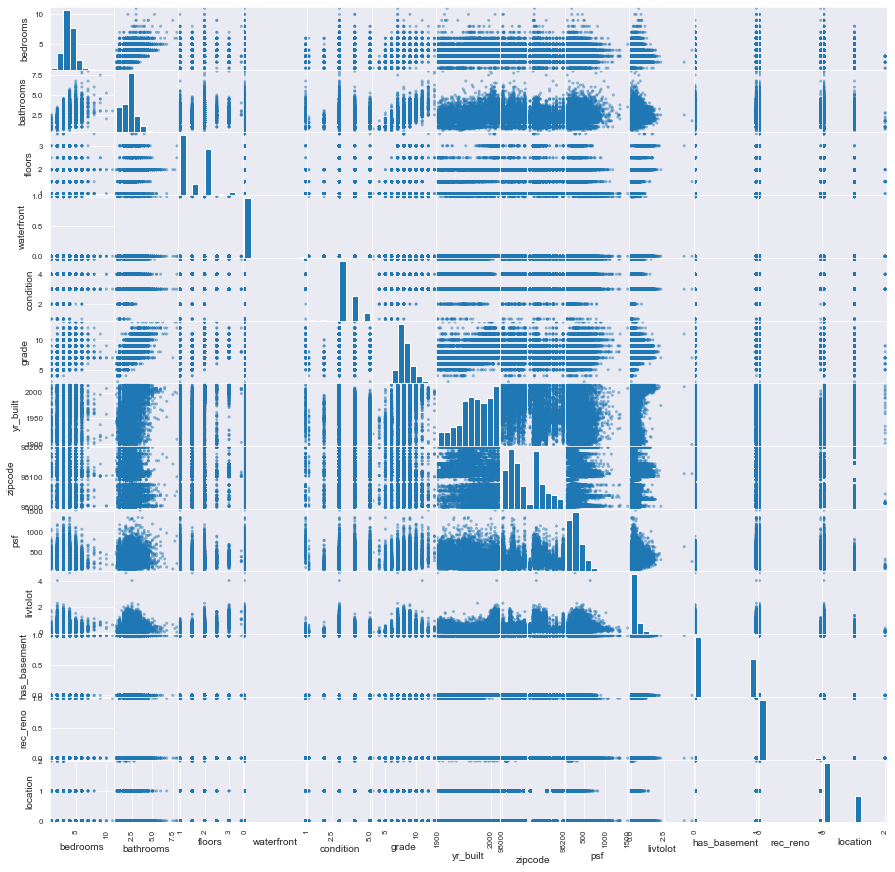

In [63]:
pd.plotting.scatter_matrix(mod_df, figsize = [15,15]);

In [64]:
mod_df.corr()

bedrooms  bathrooms    floors  waterfront  condition     grade  \
bedrooms      1.000000   0.527870  0.183707   -0.002054   0.023440  0.366174   
bathrooms     0.527870   1.000000  0.502574    0.063628  -0.126443  0.665834   
floors        0.183707   0.502574  1.000000    0.020794  -0.264013  0.458783   
waterfront   -0.002054   0.063628  0.020794    1.000000   0.016659  0.082817   
condition     0.023440  -0.126443 -0.264013    0.016659   1.000000 -0.146854   
...                ...        ...       ...         ...        ...       ...   
psf          -0.080011  -0.001580 -0.157565    0.200274   0.195401  0.122061   
livtolot      0.027760   0.287012  0.556703   -0.029807  -0.156500  0.191394   
has_basement  0.160391   0.159897 -0.252426    0.039227   0.130422  0.050736   
rec_reno      0.031587   0.068413  0.007508    0.048177  -0.072401  0.037696   
location     -0.001680  -0.069740 -0.095481    0.006251   0.008463 -0.173778   

              yr_built   zipcode       psf  livtolot  has_basement  rec_reno  \
bedrooms      0.160736 -0.158588 -0.080011  0.027760      0.160391  0.031587   
bathrooms     0.507166 -0.204778 -0.001580  0.287012      0.159897  0.068413   
floors        0.489175 -0.059522 -0.157565  0.556703     -0.252426  0.007508   
waterfront   -0.024491  0.028925  0.200274 -0.029807      0.039227  0.048177   
condition    -0.361555  0.002835  0.195401 -0.156500      0.130422 -0.072401   
...                ...       ...       ...       ...           ...       ...   
psf          -0.343812  0.208942  1.000000  0.141128      0.438295  0.120508   
livtolot      0.279050  0.177526  0.141128  1.000000      0.152112  0.012980   
has_basement -0.163953  0.159578  0.438295  0.152112      1.000000  0.049453   
rec_reno     -0.155532  0.051733  0.120508  0.012980      0.049453  1.000000   
location      0.147446 -0.195982 -0.523555 -0.249754     -0.163134 -0.038726   

              location  
bedrooms     -0.001680  
bathrooms    -0.069740  
floors       -0.095481  
waterfront    0.006251  
condition     0.008463  
...                ...  
psf          -0.523555  
livtolot     -0.249754  
has_basement -0.163134  
rec_reno     -0.038726  
location      1.000000  

[13 rows x 13 columns]

## Multicollinearity Findings

In [65]:
# Need to keep an eye on the relationship between Bathrooms, Bedrooms, Floors, and Grade.
# It makes sense that the more floors a home has, the more bathrooms.
# Also, the more bedrooms, the more bathrooms are needed.

# Initial Regression Modeling

In [66]:
mod_df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'zipcode', 'psf', 'livtolot', 'has_basement', 'rec_reno',
       'location'],
      dtype='object')

In [67]:
mod_categorical = ['waterfront','has_basement','rec_reno']

In [68]:
y = mod_df[['psf']]
X = mod_df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'livtolot', 'has_basement', 'rec_reno']]

In [69]:

linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.42711836932527714
Test R2:  0.4292391237085246
Train RMSE:  110.92479555493453
Test RMSE:  113.96764333961906


In [70]:
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
    return model

In [71]:
model(X_train, X_test, y_train, y_test)

Train R2:  0.42711836932527714
Test R2:  0.4292391237085246
Train RMSE:  110.92479555493453
Test RMSE:  113.96764333961906


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     1287.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:58:16   Log-Likelihood:            -1.0586e+05
No. Observations:               17276   AIC:                         2.117e+05
Df Residuals:                   17265   BIC:                         2.118e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3867.0395     77.785     49.715      0.000    3714.574    4019.505
bedrooms       -30.3760      1.128    -26.923      0.000     -32.588     -28.165
bathrooms       -0.1008      1.856     -0.054      0.957      -3.739       3.538
floors         -36.3373      2.530    -14.363      0.000     -41.296     -31.379
waterfront     279.4791     10.536     26.526      0.000     258.827     300.131
condition       16.3801      1.437     11.397      0.000      13.563      19.197
grade           45.7603      1.000     45.766      0.000      43.800      47.720
yr_built        -1.9687      0.040    -49.768      0.000      -2.046      -1.891
livtolot       126.3101      4.169     30.300      0.000     118.139     134.481
has_basement    89.5196      2.130     42.025      0.000      85.344      93.695
rec_reno        29.6412      5.527      5.363      0.000      18.807      40.475
==============================================================================
Omnibus:                     3704.984   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12928.351
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                       6.668   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:

formula = 'psf ~ bedrooms+bathrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1614.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:58:16   Log-Likelihood:            -1.3245e+05
No. Observations:               21596   AIC:                         2.649e+05
Df Residuals:                   21585   BIC:                         2.650e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3873.8488     69.471     55.762      0.000    3737.680    4010.018
C(waterfront)[T.1.0]   279.5992      9.361     29.869      0.000     261.251     297.947
C(has_basement)[T.1]    89.5209      1.913     46.800      0.000      85.772      93.270
C(rec_reno)[T.1]        30.3769      5.056      6.008      0.000      20.466      40.288
bedrooms               -29.9355      1.016    -29.461      0.000     -31.927     -27.944
bathrooms                1.3900      1.672      0.832      0.406      -1.886       4.666
floors                 -38.6242      2.269    -17.020      0.000     -43.072     -34.176
condition               16.3721      1.284     12.755      0.000      13.856      18.888
grade                   45.4981      0.901     50.488      0.000      43.732      47.264
yr_built                -1.9717      0.035    -55.764      0.000      -2.041      -1.902
livtolot               128.3763      3.773     34.027      0.000     120.981     135.771
==============================================================================
Omnibus:                     4619.453   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16156.665
Skew:                           1.059   Prob(JB):                         0.00
Kurtosis:                       6.670   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dropping Bathroom

In [73]:
mod2_df = mod_df.drop('bathrooms',axis=1)

In [74]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)'
model = ols(formula=formula, data=mod2_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     1793.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:58:16   Log-Likelihood:            -1.3245e+05
No. Observations:               21596   AIC:                         2.649e+05
Df Residuals:                   21586   BIC:                         2.650e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3853.2703     64.914     59.360      0.000    3726.035    3980.506
C(waterfront)[T.1.0]   279.9403      9.352     29.934      0.000     261.610     298.270
C(has_basement)[T.1]    89.9371      1.846     48.714      0.000      86.318      93.556
C(rec_reno)[T.1]        30.9197      5.014      6.167      0.000      21.092      40.748
bedrooms               -29.5950      0.930    -31.825      0.000     -31.418     -27.772
floors                 -38.1580      2.199    -17.353      0.000     -42.468     -33.848
condition               16.4572      1.279     12.862      0.000      13.949      18.965
grade                   45.7977      0.826     55.446      0.000      44.179      47.417
yr_built                -1.9621      0.033    -58.713      0.000      -2.028      -1.897
livtolot               128.3382      3.772     34.020      0.000     120.944     135.733
==============================================================================
Omnibus:                     4623.296   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16177.847
Skew:                           1.060   Prob(JB):                         0.00
Kurtosis:                       6.673   Cond. No.                     1.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Findings

# Considering other features: Geography

In [75]:
import matplotlib.image as mpimg

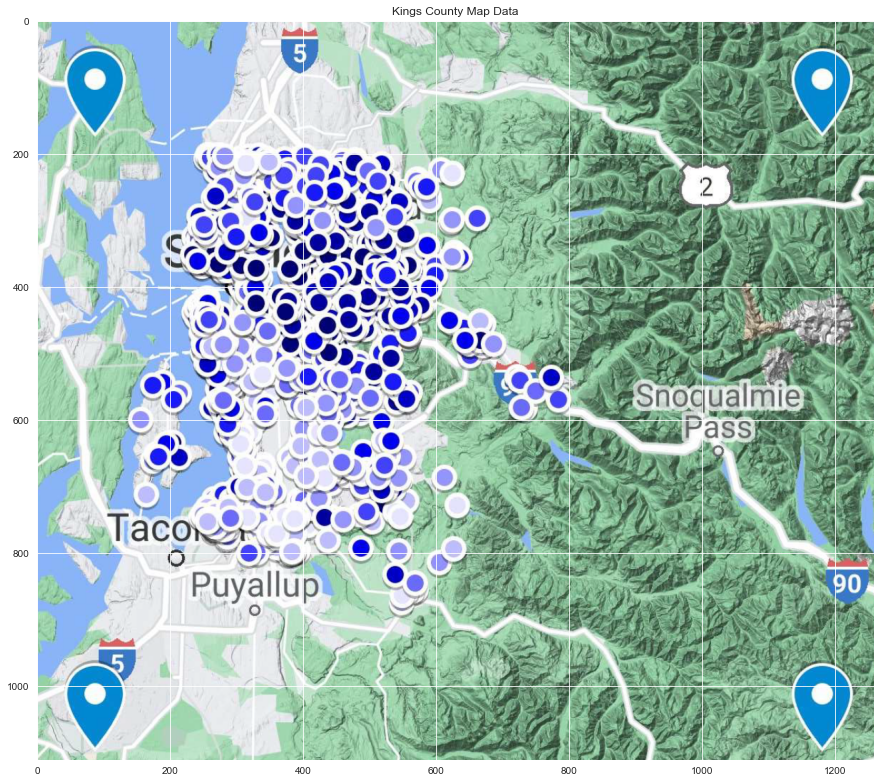

In [76]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(15,15))
img = mpimg.imread('data/map.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

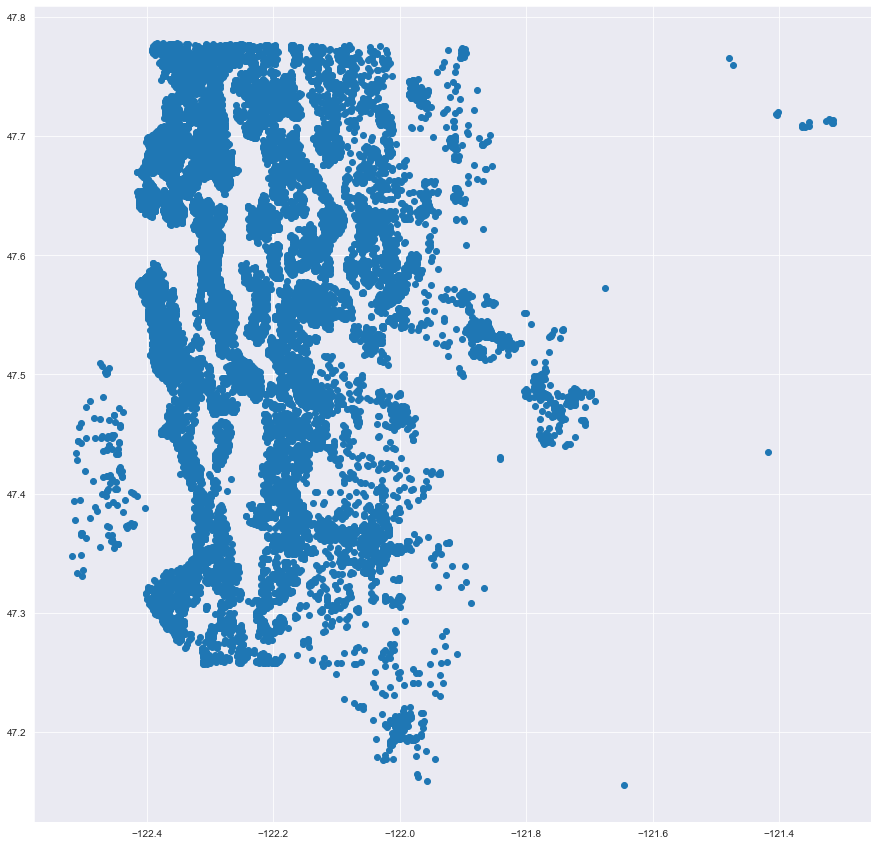

In [77]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(df.long,df.lat);

## Geographical findings

In [78]:
## North appears to have more expensive homes.
## There are several homes in the outskirts, such as the mountains, or separate isolated towns
## There are also two islands, Vashon and Mercer Island

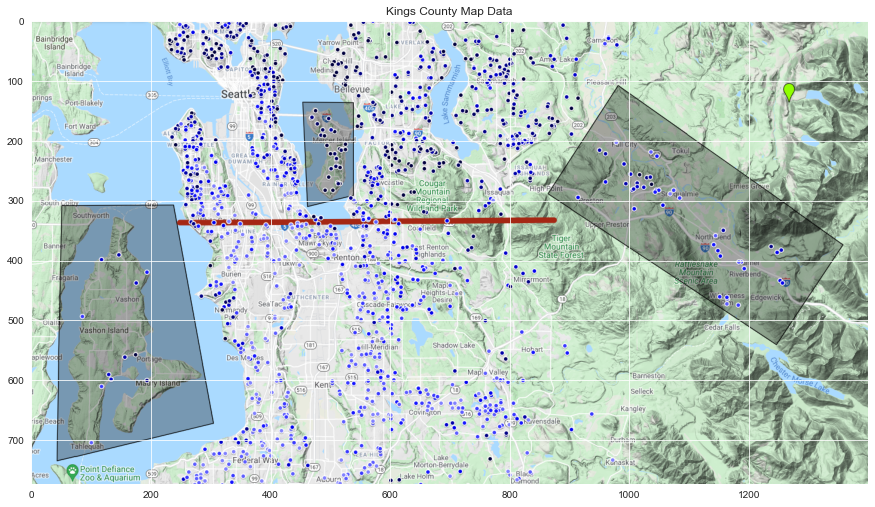

In [79]:
fig, ax = plt.subplots(figsize=(15,15))
img = mpimg.imread('data/map_areas.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

In [80]:
df.loc[(df.lat <47.2) & (df.long > -121.8)].long

3292   -121.646
Name: long, dtype: float64

In [81]:
# Want to get longitudes greater than -121.647

In [82]:
#keeping it simple, dividing by north, south, and outer Kings County
# North = 0
# South = 1
# Outer = 2
def area_split(lat,long):
    #Outer Label
    if long > -121.647:
        return 2
    if lat > 47.5:
        return 0
    else:
        return 1
    

In [83]:
#test
print(area_split(df.lat[0],df.long[0]))
df.iloc[0]

0


price           221900.000000
bedrooms             3.000000
bathrooms            1.000000
sqft_living       1180.000000
sqft_lot          5650.000000
                    ...      
psf                188.050847
livtolot             0.208850
has_basement         0.000000
rec_reno             0.000000
location             0.000000
Name: 0, Length: 21, dtype: float64

In [84]:
print(area_split(df.lat[3292],df.long[3292]))
df.iloc[3292]

2


price           380000.000000
bedrooms             3.000000
bathrooms            2.250000
sqft_living       1860.000000
sqft_lot         15559.000000
                    ...      
psf                204.301075
livtolot             0.119545
has_basement         0.000000
rec_reno             0.000000
location             2.000000
Name: 3292, Length: 21, dtype: float64

In [85]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     2362.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:58:18   Log-Likelihood:            -1.2995e+05
No. Observations:               21596   AIC:                         2.599e+05
Df Residuals:                   21584   BIC:                         2.600e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2605.1511     60.155     43.308      0.000    2487.244    2723.059
C(waterfront)[T.1.0]   301.8404      8.334     36.220      0.000     285.506     318.175
C(has_basement)[T.1]    82.3077      1.647     49.962      0.000      79.079      85.537
C(rec_reno)[T.1]        44.2116      4.469      9.893      0.000      35.452      52.971
C(location)[T.1]      -121.9649      1.626    -75.018      0.000    -125.152    -118.778
C(location)[T.2]      -114.7953     23.473     -4.891      0.000    -160.804     -68.787
bedrooms               -25.4478      0.830    -30.648      0.000     -27.075     -23.820
floors                 -37.6723      1.959    -19.229      0.000     -41.512     -33.832
condition               21.9856      1.142     19.255      0.000      19.748      24.224
grade                   31.3317      0.761     41.196      0.000      29.841      32.822
yr_built                -1.2599      0.031    -40.384      0.000      -1.321      -1.199
livtolot                70.1122      3.449     20.327      0.000      63.351      76.873
==============================================================================
Omnibus:                     6178.295   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30264.783
Skew:                           1.305   Prob(JB):                         0.00
Kurtosis:                       8.179   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
df.zipcode

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21596, dtype: int64

In [87]:
np.sort(df.zipcode.unique())

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [88]:
z1 = [98001,98002,98003,98023,98030,98031,98032,98055,98146,98148,98166,98168,98178,98188,98198,] #the south

In [89]:
z2 = [98107,98117,98103,98115,98105,98133,98125,98177,98155, ] 

In [90]:
z3 = [98102,98106,98108,98109,98112,98113,98114,98116,98118,98119,98122,98126,98144,98136,98199]

In [91]:
z4 = [98004,98005,98006,98007,98008,98011,98027,98028,98029,98033,98034,98039, 98040,98056,98059,98052,98053,98077,98072,98074,98075,98070]

In [92]:
z5 = [98010,98022,98092,98042,98038,98058]

In [93]:
z6 = [98045, 98065, 98024, 98014,98019]

In [94]:
df['zone'] = df['zipcode']

In [95]:
def zoner(zc):
    if zc in z1:
        return 1
    if zc in z2:
        return 2
    if zc in z3:
        return 3
    if zc in z4:
        return 4
    if zc in z5:
        return 5
    if zc in z6:
        return 6

In [96]:
df['zone'] = df['zipcode'].apply(zoner)

In [97]:
df['zone']

0        1
1        2
2        4
3        3
4        4
        ..
21592    2
21593    1
21594    3
21595    4
21596    3
Name: zone, Length: 21596, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

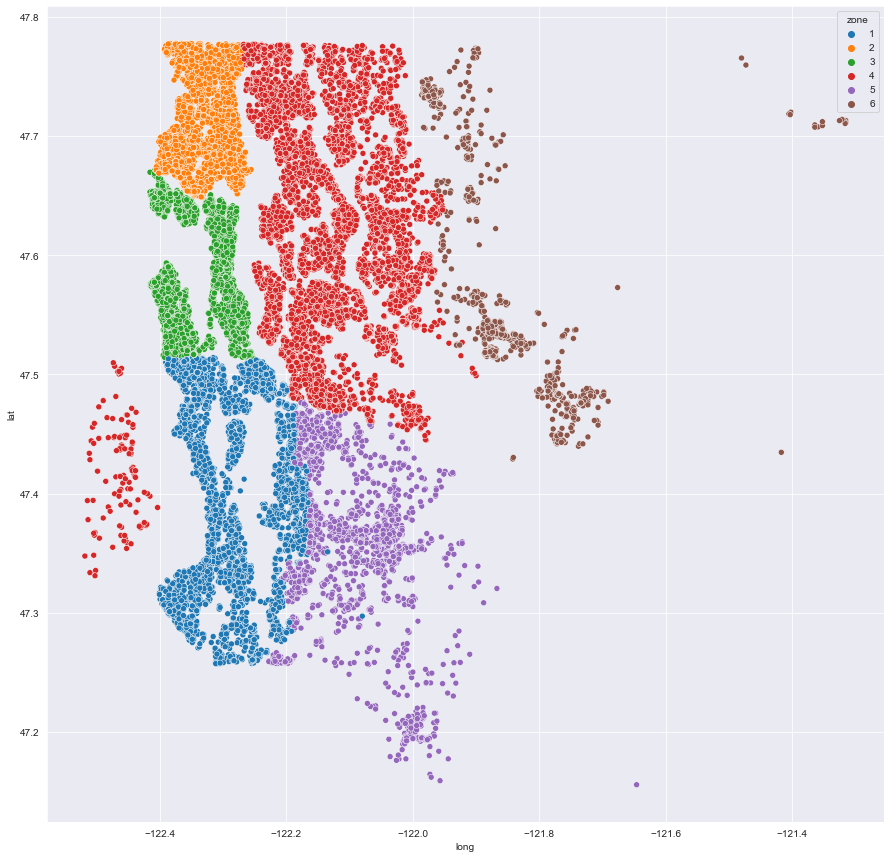

In [98]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x=df.long,y=df.lat, hue=df.zone, palette='tab10')

In [99]:
df.loc[(df.long >-122.2) & (df.zone ==2)]

Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, psf, livtolot, has_basement, rec_reno, location, zone]
Index: []

[0 rows x 22 columns]

In [100]:
mod_df['zone'] = mod_df.zipcode.apply(zoner)

In [101]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)+C(zone)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1766.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:58:19   Log-Likelihood:            -1.2944e+05
No. Observations:               21596   AIC:                         2.589e+05
Df Residuals:                   21579   BIC:                         2.591e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2097.5172     68.045     30.826      0.000    1964.145    2230.890
C(waterfront)[T.1.0]   306.3328      8.152     37.578      0.000     290.355     322.311
C(has_basement)[T.1]    79.8481      1.625     49.151      0.000      76.664      83.032
C(rec_reno)[T.1]        45.0434      4.373     10.301      0.000      36.472      53.614
C(location)[T.1]       -59.7913      2.956    -20.226      0.000     -65.586     -53.997
C(location)[T.2]       -66.4418     23.115     -2.874      0.004    -111.749     -21.135
C(zone)[T.2]           103.4136      3.536     29.246      0.000      96.483     110.344
C(zone)[T.3]           102.8296      3.634     28.293      0.000      95.706     109.953
C(zone)[T.4]            75.1312      3.129     24.015      0.000      68.999      81.263
C(zone)[T.5]            22.5068      2.644      8.513      0.000      17.324      27.689
C(zone)[T.6]            31.1116      4.173      7.456      0.000      22.932      39.291
bedrooms               -23.5069      0.820    -28.657      0.000     -25.115     -21.899
floors                 -40.1174      1.928    -20.804      0.000     -43.897     -36.338
condition               20.3638      1.129     18.031      0.000      18.150      22.578
grade                   30.3301      0.752     40.329      0.000      28.856      31.804
yr_built                -1.0351      0.035    -29.640      0.000      -1.104      -0.967
livtolot                47.4519      3.673     12.920      0.000      40.253      54.651
==============================================================================
Omnibus:                     6600.150   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37049.967
Skew:                           1.358   Prob(JB):                         0.00
Kurtosis:                       8.814   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)+C(zone)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1766.
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:58:20   Log-Likelihood:            -1.2944e+05
No. Observations:               21596   AIC:                         2.589e+05
Df Residuals:                   21579   BIC:                         2.591e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2097.5172     68.045     30.826      0.000    1964.145    2230.890
C(waterfront)[T.1.0]   306.3328      8.152     37.578      0.000     290.355     322.311
C(has_basement)[T.1]    79.8481      1.625     49.151      0.000      76.664      83.032
C(rec_reno)[T.1]        45.0434      4.373     10.301      0.000      36.472      53.614
C(location)[T.1]       -59.7913      2.956    -20.226      0.000     -65.586     -53.997
C(location)[T.2]       -66.4418     23.115     -2.874      0.004    -111.749     -21.135
C(zone)[T.2]           103.4136      3.536     29.246      0.000      96.483     110.344
C(zone)[T.3]           102.8296      3.634     28.293      0.000      95.706     109.953
C(zone)[T.4]            75.1312      3.129     24.015      0.000      68.999      81.263
C(zone)[T.5]            22.5068      2.644      8.513      0.000      17.324      27.689
C(zone)[T.6]            31.1116      4.173      7.456      0.000      22.932      39.291
bedrooms               -23.5069      0.820    -28.657      0.000     -25.115     -21.899
floors                 -40.1174      1.928    -20.804      0.000     -43.897     -36.338
condition               20.3638      1.129     18.031      0.000      18.150      22.578
grade                   30.3301      0.752     40.329      0.000      28.856      31.804
yr_built                -1.0351      0.035    -29.640      0.000      -1.104      -0.967
livtolot                47.4519      3.673     12.920      0.000      40.253      54.651
==============================================================================
Omnibus:                     6600.150   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37049.967
Skew:                           1.358   Prob(JB):                         0.00
Kurtosis:                       8.814   Cond. No.                     2.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(zipcode)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     698.0
Date:                Tue, 27 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:58:20   Log-Likelihood:            -1.2486e+05
No. Observations:               21596   AIC:                         2.499e+05
Df Residuals:                   21517   BIC:                         2.505e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              108.8133     61.062      1.782      0.075     -10.874     228.500
C(waterfront)[T.1.0]   330.4202      6.720     49.173      0.000     317.249     343.591
C(has_basement)[T.1]    74.0731      1.333     55.553      0.000      71.460      76.687
C(rec_reno)[T.1]        40.0663      3.558     11.260      0.000      33.092      47.041
C(zipcode)[T.98002]     -6.0359      6.964     -0.867      0.386     -19.685       7.613
C(zipcode)[T.98003]     -4.4010      6.268     -0.702      0.483     -16.687       7.885
C(zipcode)[T.98004]    376.2533      6.139     61.290      0.000     364.221     388.286
C(zipcode)[T.98005]    182.2546      7.405     24.613      0.000     167.741     196.769
C(zipcode)[T.98006]    178.1390      5.525     32.244      0.000     167.310     188.968
C(zipcode)[T.98007]    158.8295      7.835     20.272      0.000     143.472     174.187
C(zipcode)[T.98008]    169.1124      6.284     26.910      0.000     156.795     181.430
C(zipcode)[T.98010]     53.4408      8.895      6.008      0.000      36.006      70.876
C(zipcode)[T.98011]     89.5908      6.996     12.807      0.000      75.879     103.303
C(zipcode)[T.98014]     67.7389      8.202      8.259      0.000      51.663      83.815
C(zipcode)[T.98019]     66.5656      7.059      9.429      0.000      52.729      80.402
C(zipcode)[T.98022]     11.0860      6.620      1.675      0.094      -1.890      24.062
C(zipcode)[T.98023]    -15.1944      5.441     -2.793      0.005     -25.858      -4.531
C(zipcode)[T.98024]     93.7289      9.727      9.635      0.000      74.662     112.796
C(zipcode)[T.98027]    115.0289      5.711     20.142      0.000     103.835     126.223
C(zipcode)[T.98028]     89.0085      6.251     14.239      0.000      76.756     101.261
C(zipcode)[T.98029]    144.4223      6.089     23.719      0.000     132.488     156.357
C(zipcode)[T.98030]      7.9657      6.425      1.240      0.215      -4.627      20.559
C(zipcode)[T.98031]     11.4192      6.308      1.810      0.070      -0.945      23.784
C(zipcode)[T.98032]    -11.1162      8.171     -1.360      0.174     -27.131       4.899
C(zipcode)[T.98033]    217.8797      5.636     38.659      0.000     206.833     228.927
C(zipcode)[T.98034]    126.3715      5.348     23.630      0.000     115.889     136.854
C(zipcode)[T.98038]     39.8042      5.269      7.554      0.000      29.476      50.132
C(zipcode)[T.98039]    467.4394     11.953     39.105      0.000     444.010     490.869
C(zipcode)[T.98040]    276.2132      6.363     43.411      0.000     263.742     288.685
C(zipcode)[T.98042]     10.5513      5.338      1.977      0.048       0.088      21.014
C(zipcode)[T.98045]     65.1918      6.736      9.678      0.000      51.989      78.395
C(zipcode)[T.98052]    148.4319      5.308     27.966    

In [104]:
y = mod_df[['psf']]
X = mod_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'livtolot', 'has_basement', 'rec_reno','zipcode' ]]

# 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(zipcode)'

In [105]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.4303646876470312
Test R2:  0.4177257850158246
Train RMSE:  110.63139839040659
Test RMSE:  115.05606706987068


In [106]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X[['zipcode']])
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.4287753093080524
Test R2:  0.4232786123470972
Train RMSE:  111.67600969819794
Test RMSE:  110.97814168277031


In [107]:
#convert to dummy variables
#highp
#check assumptions

<AxesSubplot:xlabel='long', ylabel='lat'>

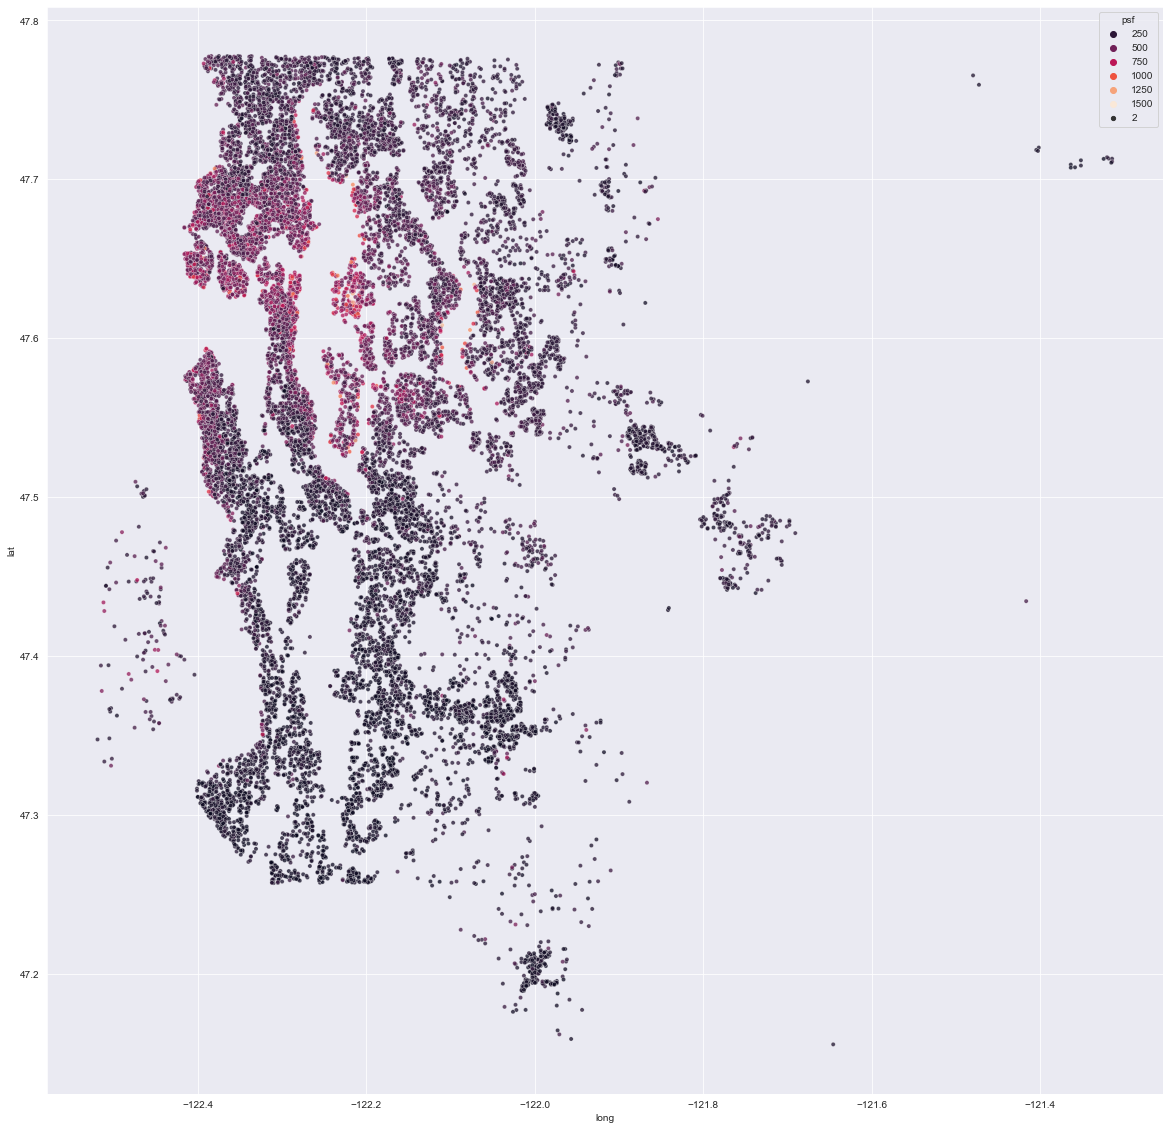

In [108]:
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(x=df.long,y=df.lat, hue=df.psf, palette='rocket', alpha=.75, size =2)

In [109]:
dummy_zips = pd.get_dummies(mod_df['zipcode'], prefix='zip', drop_first=True)

In [110]:
dummy_zips2 = pd.get_dummies(mod_df['zipcode'], prefix='zip')

In [113]:
dummy_zips2

zip_98001  zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
21592          0          0          0          0          0          0   
21593          0          0          0          0          0          0   
21594          0          0          0          0          0          0   
21595          0          0          0          0          0          0   
21596          0          0          0          0          0          0   

       zip_98007  zip_98008  zip_98010  zip_98011  ...  zip_98146  zip_98148  \
0              0          0          0          0  ...          0          0   
1              0          0          0          0  ...          0          0   
2              0          0          0          0  ...          0          0   
3              0          0          0          0  ...          0          0   
4              0          0          0          0  ...          0          0   
...          ...        ...        ...        ...  ...        ...        ...   
21592          0          0          0          0  ...          0          0   
21593          0          0          0          0  ...          1          0   
21594          0          0          0          0  ...          0          0   
21595          0          0          0          0  ...          0          0   
21596          0          0          0          0  ...          0          0   

       zip_98155  zip_98166  zip_98168  zip_98177  zip_98178  zip_98188  \
0              0          0          0          0          1          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
21592          0          0          0          0          0          0   
21593          0          0          0          0          0          0   
21594          0          0          0          0          0          0   
21595          0          0          0          0          0          0   
21596          0          0          0          0          0          0   

       zip_98198  zip_98199  
0              0          0  
1              0          0  
2              0          0  
3              0          0  
4              0          0  
...          ...        ...  
21592          0          0  
21593          0          0  
21594          0          0  
21595          0          0  
21596          0          0  

[21596 rows x 70 columns]

In [111]:
preprocessed = pd.concat([mod_df, dummy_zips], axis=1)

In [112]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [ ]:
x_p = preprocessed.drop('psf', axis=1)

In [ ]:
y_p = preprocessed['psf']

In [ ]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

In [ ]:
prepped_model = model(X_train, X_test, y_train, y_test)

In [ ]:
#pd.plotting.scatter_matrix(preprocessed, figsize = [15,15]);

In [ ]:
(preprocessed.corr() > .7)

In [ ]:
prepped_model.summary().tables[1]

In [ ]:
prepped_model.rsquared

In [ ]:
prepped_model.mse_resid

In [ ]:
prepped_model.mse_model

In [ ]:
prepped_model.params

In [ ]:
prepped_model.params.sort_values()

In [53]:
prepped_model.params.sort_values()

NameError: name 'prepped_model' is not defined

In [54]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(prepped_model,'bedrooms',fig=fig)
plt.show()

NameError: name 'prepped_model' is not defined

<Figure size 1080x576 with 0 Axes>

In [ ]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(prepped_model,'zipcode',fig=fig)
plt.show()

In [55]:
residuals = prepped_model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

NameError: name 'prepped_model' is not defined

In [56]:
q1 = np.quantile(preprocessed['psf'],.25)
q3 = np.quantile(preprocessed['psf'],.75)
IQR = q3 - q1

NameError: name 'preprocessed' is not defined

In [57]:
preprocessed['psf'].loc[((q1-1.5*IQR)>preprocessed['psf']) | (preprocessed['psf']>(q3+1.5*IQR))]

NameError: name 'preprocessed' is not defined

In [58]:
preprocessed['psf'].loc[((q1-1.5*IQR)>preprocessed['psf']) | (preprocessed['psf']>(q3+1.5*IQR))].index

NameError: name 'preprocessed' is not defined

In [59]:
outliers = preprocessed['psf'].loc[((q1-1.5*IQR)>preprocessed['psf']) | (preprocessed['psf']>(q3+1.5*IQR))].index

NameError: name 'preprocessed' is not defined

In [60]:
prepped_out = preprocessed.drop(outliers)

NameError: name 'preprocessed' is not defined

In [61]:
residuals = prepped_out.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

NameError: name 'prepped_out' is not defined

In [ ]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model(X_train, X_test, y_train, y_test)

In [ ]:
residuals = prepped_model2.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)

In [ ]:
prepped_model2 = model(X_train, X_test, y_train, y_test)

In [ ]:
residuals = prepped_model2.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
prepped_log = preprocessed

In [ ]:
prepped_log['psf'] = np.log(prepped_log['psf']) 

In [ ]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model(X_train, X_test, y_train, y_test)

In [ ]:
residuals = prepped_model3.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
prepped_sqrt = preprocessed

In [ ]:
prepped_sqrt['psf'] = np.sqrt(prepped_sqrt['psf']) 

In [ ]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model(X_train, X_test, y_train, y_test)

In [ ]:
residuals = prepped_model4.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(prepped_model4,'waterfront',fig=fig)
plt.show()

In [ ]:
X_train.columns

In [ ]:
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [ ]:
def model_outlier(X_train, X_test, y_train, y_test):
    #remove outliers first to avoid data leakage
    outliers = remove_outliers(y_train)
    X_train = X_train.drop(outliers)
    y_train = y_train.drop(outliers)
    
    
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
    
    
    return model

In [ ]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model(X_train, X_test, y_train, y_test)

In [ ]:
residuals = prepped_model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model(X_train, X_test, y_train, y_test)

In [ ]:
residuals = prepped_model2.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model(X_train, X_test, y_train, y_test)

In [ ]:
residuals = prepped_model3.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model(X_train, X_test, y_train, y_test)

In [ ]:
residuals = prepped_model4.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model_outlier(X_train, X_test, y_train, y_test)

In [ ]:
residuals = prepped_model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [ ]:
sns.scatterplot(y_p,prepped_model.resid)

In [ ]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model_outlier(X_train, X_test, y_train, y_test)

In [ ]:
sns.scatterplot(y_p,prepped_model.resid)

In [ ]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model_outlier(X_train, X_test, y_train, y_test)

In [ ]:
sns.scatterplot(y_p2,prepped_model2.resid)

In [ ]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model_outlier(X_train, X_test, y_train, y_test)

In [ ]:
sns.scatterplot(y_p3,prepped_model3.resid)

In [ ]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model_outlier(X_train, X_test, y_train, y_test)

In [ ]:
sns.scatterplot(y_p4,prepped_model4.resid)

In [ ]:
def model_outlier2(X_train, X_test, y_train, y_test):
    #remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers)
    
    
    
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
    
    
    return model

In [ ]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model_outlier2(X_train, X_test, y_train, y_test)

In [ ]:
sns.scatterplot(y_p,prepped_model.resid)

In [ ]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model_outlier2(X_train, X_test, y_train, y_test)

In [ ]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model_outlier2(X_train, X_test, y_train, y_test)

In [ ]:
sns.scatterplot(y_p3,prepped_model3.resid)

In [ ]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model_outlier2(X_train, X_test, y_train, y_test)

In [ ]:
sns.scatterplot(y_p3,prepped_model3.resid)

In [ ]:
sns.boxplot(y_p4)